***Q2*** a) Without a limit for max iterations:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Part 1: Without Feature Scaling
# -----------------------------
num_samples = 100
np.random.seed(42)

# Generate data with large feature scale
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X = np.hstack((np.ones_like(x), x))  # Add bias term

# Closed-form (true) solution
theta_star = np.linalg.inv(X.T @ X) @ X.T @ y

# Helper functions
def mse_loss(X, y, theta):
    return np.mean((X @ theta - y) ** 2)

def gradient(X, y, theta):
    return (2 / len(y)) * X.T @ (X @ theta - y)

# Gradient Descent without fixed max_iter
def gradient_descent_until_convergence(X, y, theta_star, lr=1e-7, eps=1e-3):
    theta = np.zeros((X.shape[1], 1))
    losses = []
    i = 0
    while True:
        grad = gradient(X, y, theta)
        theta -= lr * grad
        loss = mse_loss(X, y, theta)
        losses.append(loss)
        i += 1
        # Convergence check
        if np.linalg.norm(theta - theta_star) < eps:
            print(f"✅ Converged in {i} iterations (without scaling)")
            break
        # Optional safeguard (avoid infinite loops)
        if i % 100000 == 0:
            print(f"Still running... iteration {i}, loss={loss:.4f}")
    return theta, losses, i

# Run Gradient Descent
theta, losses, steps = gradient_descent_until_convergence(X, y, theta_star, lr=1e-7)

# Plot MSE vs iterations
plt.figure(figsize=(8,5))
plt.plot(losses, color='red', linewidth=2)
plt.title("MSE vs Iterations (Without Feature Scaling)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print(f"Number of iterations required for convergence (without scaling): {steps}")


Still running... iteration 100000, loss=2.1779
Still running... iteration 200000, loss=2.1624
Still running... iteration 300000, loss=2.1471
Still running... iteration 400000, loss=2.1319
Still running... iteration 500000, loss=2.1170
Still running... iteration 600000, loss=2.1022
Still running... iteration 700000, loss=2.0876
Still running... iteration 800000, loss=2.0731
Still running... iteration 900000, loss=2.0588
Still running... iteration 1000000, loss=2.0447
Still running... iteration 1100000, loss=2.0307
Still running... iteration 1200000, loss=2.0169
Still running... iteration 1300000, loss=2.0032
Still running... iteration 1400000, loss=1.9897
Still running... iteration 1500000, loss=1.9763
Still running... iteration 1600000, loss=1.9631
Still running... iteration 1700000, loss=1.9501
Still running... iteration 1800000, loss=1.9372
Still running... iteration 1900000, loss=1.9244
Still running... iteration 2000000, loss=1.9118
Still running... iteration 2100000, loss=1.8993
S

KeyboardInterrupt: 

***Q2*** a) With a limit for max iterations:

 Did not converge within max iterations.


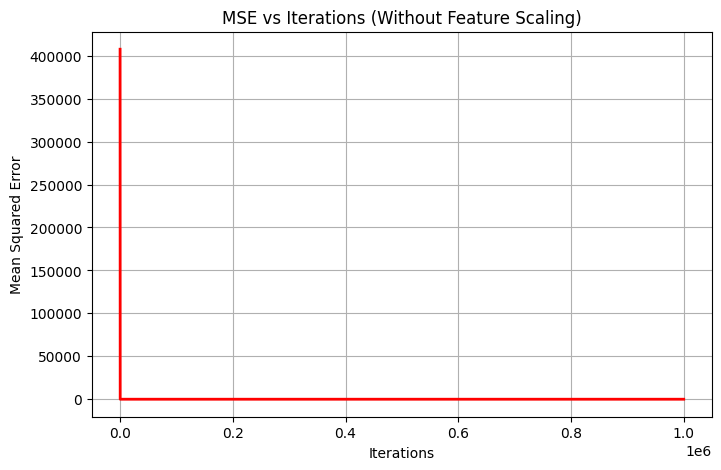

Number of iterations required for convergence (without scaling): 1000000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Part 1: Without Feature Scaling
# -----------------------------
num_samples = 100
np.random.seed(42)

# Generate data with large feature scale
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
X = np.hstack((np.ones_like(x), x))  # Add bias column

# Closed-form (true) solution
theta_star = np.linalg.inv(X.T @ X) @ X.T @ y

# MSE and Gradient functions
def mse_loss(X, y, theta):
    return np.mean((X @ theta - y)**2)

def gradient(X, y, theta):
    return (2 / len(y)) * X.T @ (X @ theta - y)

# Gradient Descent
def gradient_descent(X, y, theta_star, lr=1e-7, eps=1e-3, max_iter=10**6):
    theta = np.zeros((X.shape[1], 1))
    losses = []
    for i in range(max_iter):
        grad = gradient(X, y, theta)
        theta -= lr * grad
        losses.append(mse_loss(X, y, theta))
        if np.linalg.norm(theta - theta_star) < eps:
            print(f"Converged in {i+1} iterations (without scaling)")
            return theta, losses, i+1
    print(" Did not converge within max iterations.")
    return theta, losses, max_iter

# Run gradient descent
theta, losses, steps = gradient_descent(X, y, theta_star, lr=1e-6)

# Plot MSE vs iterations
plt.figure(figsize=(8,5))
plt.plot(losses, color='red', linewidth=2)
plt.title("MSE vs Iterations (Without Feature Scaling)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print(f"Number of iterations required for convergence (without scaling): {steps}")


***Q2*** b)With Feature Scaling (Z-score normalization)

✅ Converged in 65 iterations (with scaling)


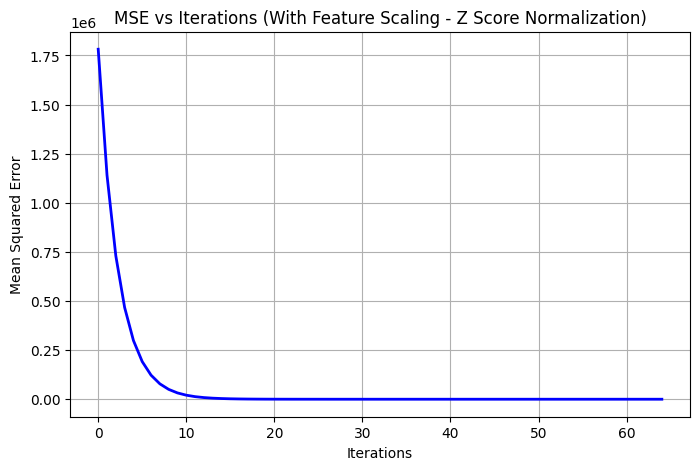

Number of iterations required for convergence (with scaling): 65


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100
np.random.seed(42)

# Generate same data
x = np.random.uniform(0, 1000, num_samples)
f_x = 3 * x + 2
eps = np.random.randn(num_samples)
y = f_x + eps

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

# Z-score normalization
x_mean = np.mean(x)
x_std = np.std(x)
x_scaled = (x - x_mean) / x_std

X_scaled = np.hstack((np.ones_like(x_scaled), x_scaled))  # Add bias column

# Closed-form true solution (scaled)
theta_star_scaled = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y

# Functions
def mse_loss(X, y, theta):
    return np.mean((X @ theta - y)**2)

def gradient(X, y, theta):
    return (2 / len(y)) * X.T @ (X @ theta - y)

def gradient_descent(X, y, theta_star, lr=0.1, eps=1e-3, max_iter=10**6):
    theta = np.zeros((X.shape[1], 1))
    losses = []
    for i in range(max_iter):
        grad = gradient(X, y, theta)
        theta -= lr * grad
        losses.append(mse_loss(X, y, theta))
        if np.linalg.norm(theta - theta_star) < eps:
            print(f"✅ Converged in {i+1} iterations (with scaling)")
            return theta, losses, i+1
    print("❌ Did not converge within max iterations.")
    return theta, losses, max_iter

# Run gradient descent
theta_scaled, losses_scaled, steps_scaled = gradient_descent(X_scaled, y, theta_star_scaled, lr=0.1)

# Plot MSE vs iterations
plt.figure(figsize=(8,5))
plt.plot(losses_scaled, color='blue', linewidth=2)
plt.title("MSE vs Iterations (With Feature Scaling - Z Score Normalization)")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

print(f"Number of iterations required for convergence (with scaling): {steps_scaled}")
